## COMO USAR NLTK


In [ ]:

import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [ ]:
import re
corpus = nltk.corpus.cess_esp.sents()
print(corpus)
print(len(corpus))

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
6030


In [ ]:
flatten = [w for l in corpus for w in l]

##estructura de la funcion re.search()
determina si el patron de busqueda p esta contenido en la cadena s
re.search(p, s)

In [ ]:
array = [w for w in flatten if re.search('es', w)]
array[:5]

['estatal', 'jueves', 'empresa', 'centrales', 'francesa']

In [ ]:
array = [w for w in flatten if re.search('^es', w)]
array[:5]

['estatal', 'es', 'esta', 'esta', 'eso']

In [ ]:
# Rango [a-z] [ghi]

In [ ]:
array = [w for w in flatten if re.search('^[ghi]', w)]
array[:10]


['grupo',
 'hoy',
 'gas',
 'gas',
 'intervendrá',
 'invertir',
 'gas',
 'hoy',
 'insulto',
 'intervención']

In [ ]:
#clausura
#*0 o mas veces
#+ 1 o mas veces
array = [w for w in flatten if re.search('^(no)+', w)]
array[:20]

['norte',
 'no',
 'no',
 'noche',
 'no',
 'no',
 'notificación',
 'no',
 'no',
 'no',
 'no_obstante',
 'no',
 'no',
 'no',
 'norte',
 'no',
 'no',
 'no',
 'no',
 'norteamericano']

# tormalizacion de texto(como aplicacion de las expresiones regulares

In [ ]:
print(r'esta es \n una prueba')

esta es \n una prueba


## tokenizacion: es el proceso mediante el cual se sub-divide una cadena de texto en unidades linguisticas minimas(palabras)


In [ ]:
texto = ''' Cuando sea el rey del mundo (imaginaba el en su cabeza) no tendre que preocuparme por estas bobadas.
            era solo un niño de 7 años, pero pensaba que podria ser cualquier cosa que su imaginacion le permitiera
            visualizar en su cabeza ...'''

In [ ]:
# caso 1: tokenizar por espacios vacios
print(re.split(r' ',texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '(imaginaba', 'el', 'en', 'su', 'cabeza)', 'no', 'tendre', 'que', 'preocuparme', 'por', 'estas', 'bobadas.\n', '', '', '', '', '', '', '', '', '', '', '', 'era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podria', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginacion', 'le', 'permitiera\n', '', '', '', '', '', '', '', '', '', '', '', 'visualizar', 'en', 'su', 'cabeza', '...']


In [ ]:
# Caso 2: tokenizacion usando regex extensiones regulares separa en dif palabras 
print(re.split(r'[ ,\n\t]+',texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '(imaginaba', 'el', 'en', 'su', 'cabeza)', 'no', 'tendre', 'que', 'preocuparme', 'por', 'estas', 'bobadas.', 'era', 'solo', 'un', 'niño', 'de', '7', 'años', 'pero', 'pensaba', 'que', 'podria', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginacion', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '...']


In [ ]:
#Caso 3:
print(re.split(r'[ \W\t\n]+', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', 'imaginaba', 'el', 'en', 'su', 'cabeza', 'no', 'tendre', 'que', 'preocuparme', 'por', 'estas', 'bobadas', 'era', 'solo', 'un', 'niño', 'de', '7', 'años', 'pero', 'pensaba', 'que', 'podria', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginacion', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '']


cuando esto no sea suficiente y haya mas caracteres especiales usamos lo siguiente


# Tokenizador de NLTK

In [ ]:
texto = 'en los ee.uu esa postal vale $15.50 ...'
print(re.split(r'[ \W\t\t]+', texto))

['en', 'los', 'ee', 'uu', 'esa', 'postal', 'vale', '15', '50', '']


In [ ]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''
nltk.regexp_tokenize(texto, pattern)           

['en', 'los', 'ee', '.', 'uu', 'esa', 'postal', 'vale', '$15.50', '...']

### Configuracion inicial



*   En este notebook vamos a descargar el dataset book que contiene muchos libros en ingles en formato de texto tokenizadom de los cuales vamos a hacer procesamiento.




In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

# Analizando un texto

In [ ]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
len(text1)

260819

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [ ]:
#primero realizamos la construccion de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [ ]:
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [ ]:
def riqueza_lexica(texto):
  vocabulario = sorted(set(text1))
  return len(vocabulario)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [ ]:
def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

In [ ]:
porcentaje_palabra('monster',text1)

0.018786974875296663

In [ ]:
text1.count('monster')

49

## Estadistica del lenguaje

*   Podemos construir un diccionario en python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras

*   ejemplo dic = {'monster' : 49, 'boat': 54,...}





In [ ]:
dic = {}
for palabra in set(text1):
  dic[palabra] = text1.count(palabra)
dic

{'killed': 33,
 'assembled': 3,
 'Excellent': 1,
 'conjures': 1,
 'hard': 79,
 'Dugongs': 1,
 'whereto': 1,
 'Arrived': 2,
 'Sleeping': 2,
 'unlettered': 1,
 'invests': 5,
 'wedge': 2,
 'kindling': 2,
 'tangled': 1,
 'muttering': 4,
 'summer': 14,
 'siding': 1,
 'sated': 1,
 'orchard': 2,
 'bait': 1,
 'SONG': 2,
 'concentrating': 2,
 'veteran': 4,
 'accompanied': 6,
 'Twas': 3,
 'leaving': 38,
 'tasks': 1,
 'kink': 2,
 'vacancies': 2,
 'torn': 15,
 'marge': 1,
 'leave': 18,
 'kind': 27,
 'perplexity': 3,
 'routine': 1,
 'countrymen': 1,
 'lodge': 3,
 'Muezzin': 1,
 'importing': 1,
 'summers': 2,
 'NATHAN': 1,
 'corporeal': 4,
 'bloated': 1,
 'quietest': 1,
 'stairs': 10,
 'subtler': 1,
 'moodiness': 1,
 'mell': 2,
 'Nile': 2,
 'herons': 1,
 'noises': 2,
 'relatives': 1,
 'base': 20,
 'naked': 12,
 'topers': 1,
 'migratory': 1,
 ":--'": 2,
 'whistlingly': 1,
 'THUS': 1,
 'Bishop': 5,
 'misanthrope': 1,
 'anxious': 9,
 'burden': 7,
 'Bonapartes': 1,
 'SETH': 1,
 'ply': 2,
 'run': 51,
 'e

# Metodo FreqDist de NLTK

In [ ]:
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

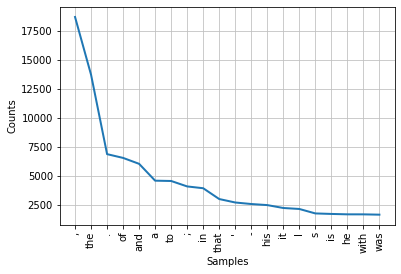

In [ ]:
fdist.plot(20)

In [ ]:
fdist['monster']

49

# Distribuciones sobre contenido con filtro-fino
*   Como vimos en la seccion anterior, los tokens mas frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo.
*   Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuacion o caracteres especiales


In [ ]:
long_words = [palabra for palabra in text1 if len(palabra)>5]

In [ ]:
long_words

['Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Consumptive',
 'Grammar',
 'School',
 'threadbare',
 'dusting',
 'lexicons',
 'grammars',
 'handkerchief',
 'mockingly',
 'embellished',
 'nations',
 'grammars',
 'somehow',
 'mildly',
 'reminded',
 'mortality',
 'school',
 'others',
 'called',
 'tongue',
 'leaving',
 'through',
 'ignorance',
 'letter',
 'almost',
 'maketh',
 'signification',
 'deliver',
 'HACKLUYT',
 'animal',
 'roundness',
 'rolling',
 'arched',
 'vaulted',
 'WEBSTER',
 'DICTIONARY',
 'immediately',
 'WALLEN',
 'wallow',
 'RICHARDSON',
 'DICTIONARY',
 'DANISH',
 'SWEDISH',
 'ICELANDIC',
 'ENGLISH',
 'BALEINE',
 'FRENCH',
 'BALLENA',
 'SPANISH',
 'ERROMANGOAN',
 'EXTRACTS',
 'Supplied',
 'Librarian',
 'painstaking',
 'burrower',
 'appears',
 'through',
 'Vaticans',
 'street',
 'stalls',
 'picking',
 'whatever',
 'random',
 'allusions',
 'whales',
 'anyways',
 'whatsoever',
 'sacred',
 'profane',
 'Therefore',
 'higgledy',
 'piggledy',
 'statements',
 'however',
 'au

In [ ]:
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos construir una lista de tuplas, basados en los conteos ya pre-calculados de la funcion FreqDist, asi:

fdist_filtrado = [('account, 2), ('additional', 32), ('advancing', 5), ...]

puego podemos convertir el objeto creado a forma de np.array de Numpy para poder hacer un sort de palabras mas frecuentes.

fdist_filtrado = np.array(fdist_filtrado, *args)
np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing',5), ('additional', 32), ...]

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10] 

In [ ]:
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype = dtypes)

In [ ]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

In [ ]:
#construccion de un grafico de barras customizado con matplotlib

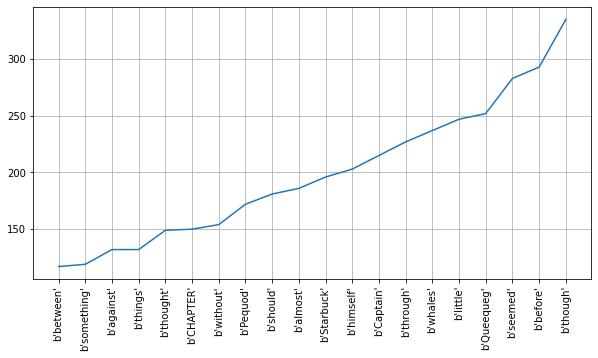

In [ ]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation = 'vertical')
plt.grid(True)
plt.show()